In [35]:
from Reader_sat import *
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
import numpy as np

In [28]:
path_image = "/home/sebasmos/Documentos/AI india/ai.team.datasets/Datasets /1. kaychallay/T45QXE_2021-04-19.tif"
#path_image = "/home/sebasmos/Documentos/AI india/ai.team.datasets/Datasets /2. Sameeksha Gour/SAMEEKSHA GOUR (img).tif"
#path_image = "/home/sebasmos/Documentos/AI india/ai.team.datasets/Datasets /3. Apoor/apoorvjain.qgis.tiff"
path_label = "/home/sebasmos/Documentos/AI india/ai.team.datasets/Datasets /1. kaychallay/T45QXE_2021-04-19_default.ome.tiff"
#path_label = "/home/sebasmos/Documentos/AI india/ai.team.datasets/Datasets /2. Sameeksha Gour/SAMEEKSHA GOUR (ANNOTATION).tiff"
#path_label = "/home/sebasmos/Documentos/AI india/ai.team.datasets/Datasets /3. Apoor/apoorvjain.apeerannotatedimage.tiff"
path_out = "/home/sebasmos/Documentos/AI india/ai.team.datasets/Datasets /1. kaychallay/"

In [29]:
image = rasterio.open(path_image)

labels = rasterio.open(path_label)

##############################################################################
# Image information

# How many bands does this image have?
num_bands = image.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

rows, cols = image.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = image.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = image.crs
print('Image projection:')
print(proj)

image = image.read()
image.shape

###############################################################################

labels = labels.read()
labels.shape
unique, counts = np.unique(labels, return_counts=True)
list(zip(unique, counts))

# img
#plt.imshow(test_img.

Number of bands in image: 1

Image size is: 10980 rows x 10980 columns

Raster driver: GTiff

Image projection:
EPSG:32645


[(0, 148870),
 (1, 5421966),
 (2, 35001),
 (3, 2378117),
 (4, 329811),
 (5, 178349),
 (6, 322218),
 (7, 3452773),
 (8, 5056894),
 (9, 1176275),
 (10, 1731320),
 (11, 858469),
 (12, 2148429),
 (13, 3808302),
 (14, 231091),
 (20, 7408829),
 (21, 1238593),
 (22, 182016),
 (23, 10779),
 (24, 360559),
 (25, 717754),
 (26, 15670),
 (27, 42363),
 (28, 71136716),
 (29, 4526283),
 (30, 2785286),
 (31, 36783),
 (32, 528583),
 (33, 85057),
 (34, 343209),
 (35, 787141),
 (36, 520793),
 (37, 365602),
 (38, 598138),
 (39, 427302),
 (40, 927055),
 (41, 238004)]

(10980, 10980)
(10980, 10980)


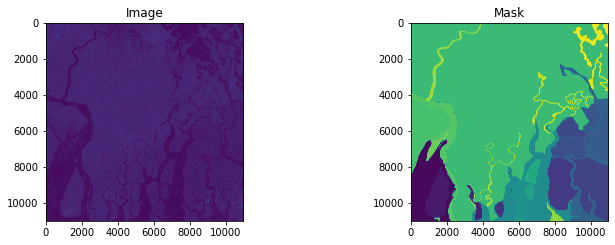

In [30]:
large_image_stack = tiff.imread(path_image)
large_mask_stack = tiff.imread(path_label)
print(large_image_stack.shape)
print(large_mask_stack.shape)

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Image')
plt.imshow(large_image_stack)
plt.subplot(222)
plt.title('Mask')
plt.imshow(large_mask_stack)
plt.show()

In [38]:

def cutter2(path_image, path_label,path_out):
    large_image_stack = tiff.imread(path_image)
    large_mask_stack = tiff.imread(path_label)

    large_image = large_image_stack[:,:]
    patches_img = patchify(large_image, (128, 128), step=128)  #Step=256 for 256 patches means no overlap

    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i,j,:,:]
            tiff.imwrite(path_out + '/patches/images/' + 'image_' + '_' + str(i)+str(j)+ ".tif", single_patch_img)


    large_mask = large_mask_stack[:,:]

    patches_mask = patchify(large_mask, (128, 128), step=128)  #Step=256 for 256 patches means no overlap


    for i in range(patches_mask.shape[0]):

        for j in range(patches_mask.shape[1]):
            single_patch_mask = patches_mask[i,j,:,:]
            tiff.imwrite(path_out +'/patches/masks/' + 'mask_' + '_' + str(i)+str(j)+ ".tif", single_patch_mask)
            single_patch_mask = single_patch_mask / 255.

In [39]:
cutter2(path_image, path_label,path_out)